Teleportation Protocol Checking


In [2]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 2.0 MB/s  0:00:06eta 0:00:02m
Note: you may need to restart the kernel to use updated packages.


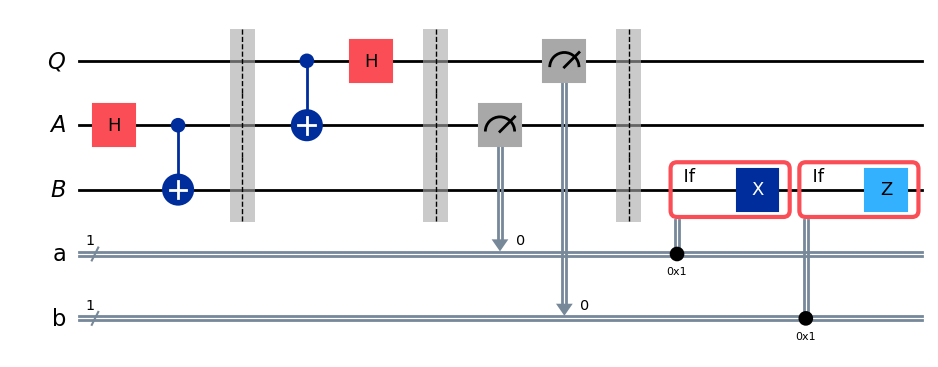

array([[-0.9715484 +0.j        , -0.14928865-0.18386571j],
       [ 0.12971042+0.19816384j,  0.2956756 -0.92546326j]])

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
from IPython.display import display

# Quantum & Classical Registers
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# -----------------------------------------------
# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# -----------------------------------------------
# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# -----------------------------------------------
# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# -----------------------------------------------
# Bob uses classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

# Draw final circuit
display(protocol.draw(output='mpl'))

# -----------------------------------------------
# Create random UGate (random quantum state for Q)
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

# Optional: Apply random gate to Q
# protocol.append(random_gate, [qubit])
# protocol.barrier()




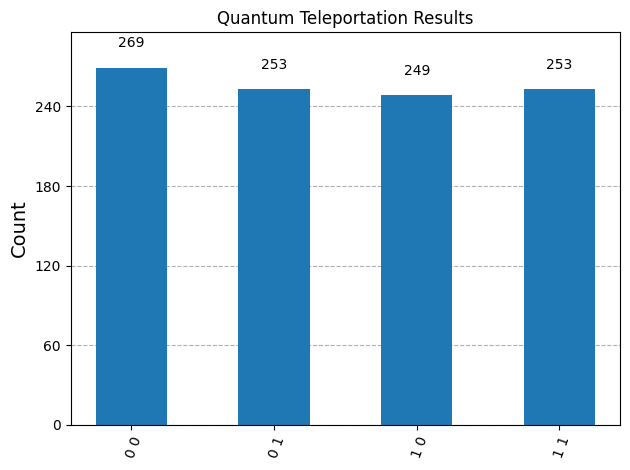

In [6]:
# To simulate:
sim = AerSimulator()
result = sim.run(protocol, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts, title="Quantum Teleportation Results")

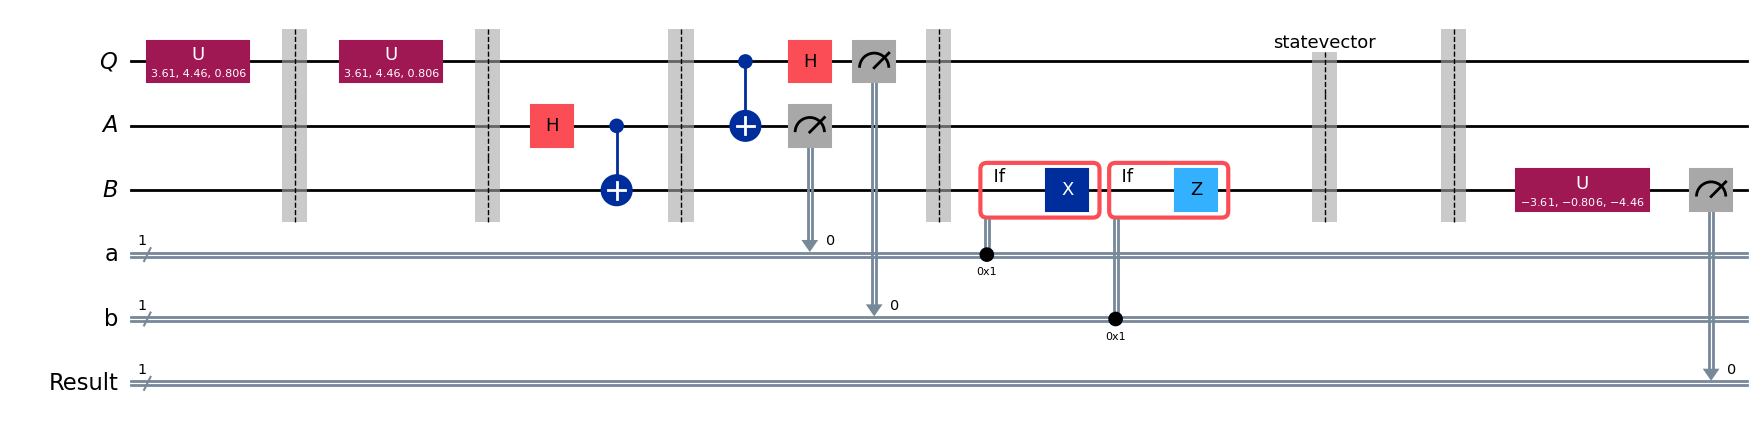

In [13]:
# ======================================================
#  Quantum Teleportation Verification Circuit
# ======================================================

from qiskit import QuantumCircuit, ClassicalRegister

# Create a new circuit including the same bits and qubits used in the teleportation protocol
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q
test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above
test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure
test.append(random_gate.inverse(), ebit1)

# Add a classical register for measurement results
result = ClassicalRegister(1, "Result")
test.add_register(result)

# Measure Bob’s qubit (B) after applying the inverse random gate
test.measure(ebit1, result)

# Display the final verification circuit
display(test.draw(output='mpl'))


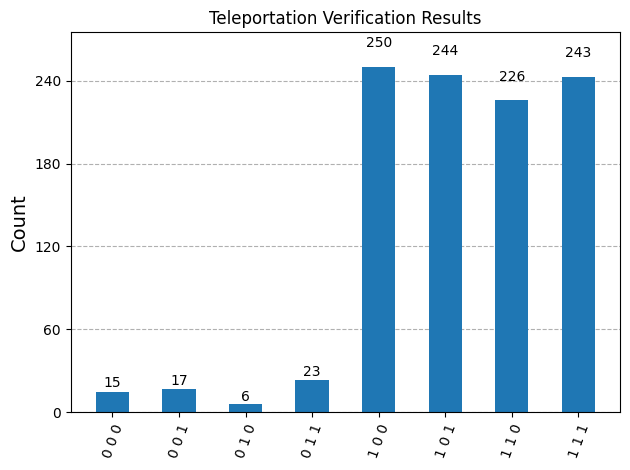

In [15]:
results = AerSimulator().run(test).result()
stats = results.get_counts()
display(plot_histogram(stats, title="Teleportation Verification Results"))

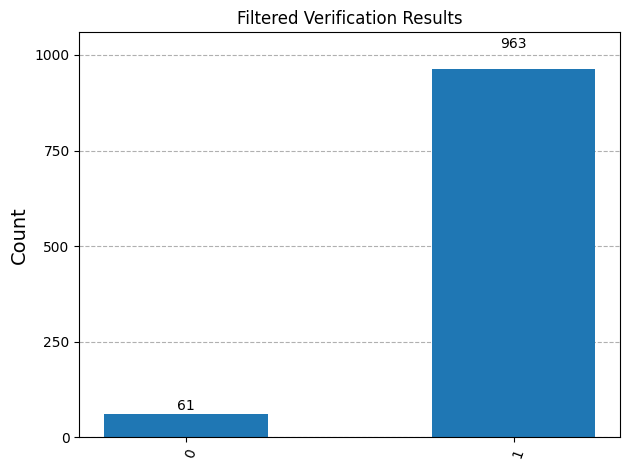

In [18]:
filtered_stats = marginal_distribution(stats, indices=[2])
display(plot_histogram(filtered_stats, title="Filtered Verification Results"))